## Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Loading the dataset

In [ ]:
data = pd.read_excel('/content/sample_data/heart_disease.xlsx',sheet_name ='Heart_disease')

## EDA

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
data.shape

(908, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
data.isnull().sum()    #finding no. of null values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


In [ ]:
data.duplicated().sum()    # finding duplicate rows

1

In [ ]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [ ]:
data = data.drop_duplicates()    #dropping duplicate row

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [ ]:
data.fbs = data.fbs.astype('int')    # changing data type of col 'fbs' from bool to int where 0 - false and 1 - true

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
data.exang.unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [ ]:
#replacing values to their correct form of true and false to maintain consistency in data
data.exang = data.exang.replace({'TURE':'True','FALSE':'False'})

In [ ]:
data.exang.unique()

array([False, True, 'False', 'True'], dtype=object)

In [ ]:
data.exang = data.exang.apply(lambda x: bool(x) if isinstance(x, bool) else x == 'True')   # converting all values from object to bool

In [ ]:
data.exang.unique()

array([False,  True])

In [ ]:
data.exang = data.exang.astype(int)    # converting values from bool to int where 0 - false and 1 - true

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,0,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,0,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,0,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,0,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,1,1.5,flat,fixed defect,0


## Filling null values

In [ ]:
# using fill na and filling null values with median of 'oldpeak' col
data.oldpeak = data.oldpeak.fillna(data.oldpeak.median())

##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
# label encoding columns 'sex', 'cp', 'restecg', 'slope', 'thal' as they have less than 5 categories and this will further make it easier to train model
for col in ['sex', 'cp', 'restecg', 'slope', 'thal']:
    data[col] = le.fit_transform(data[col])

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,0.5,0,0,4


## Plotting Histogram

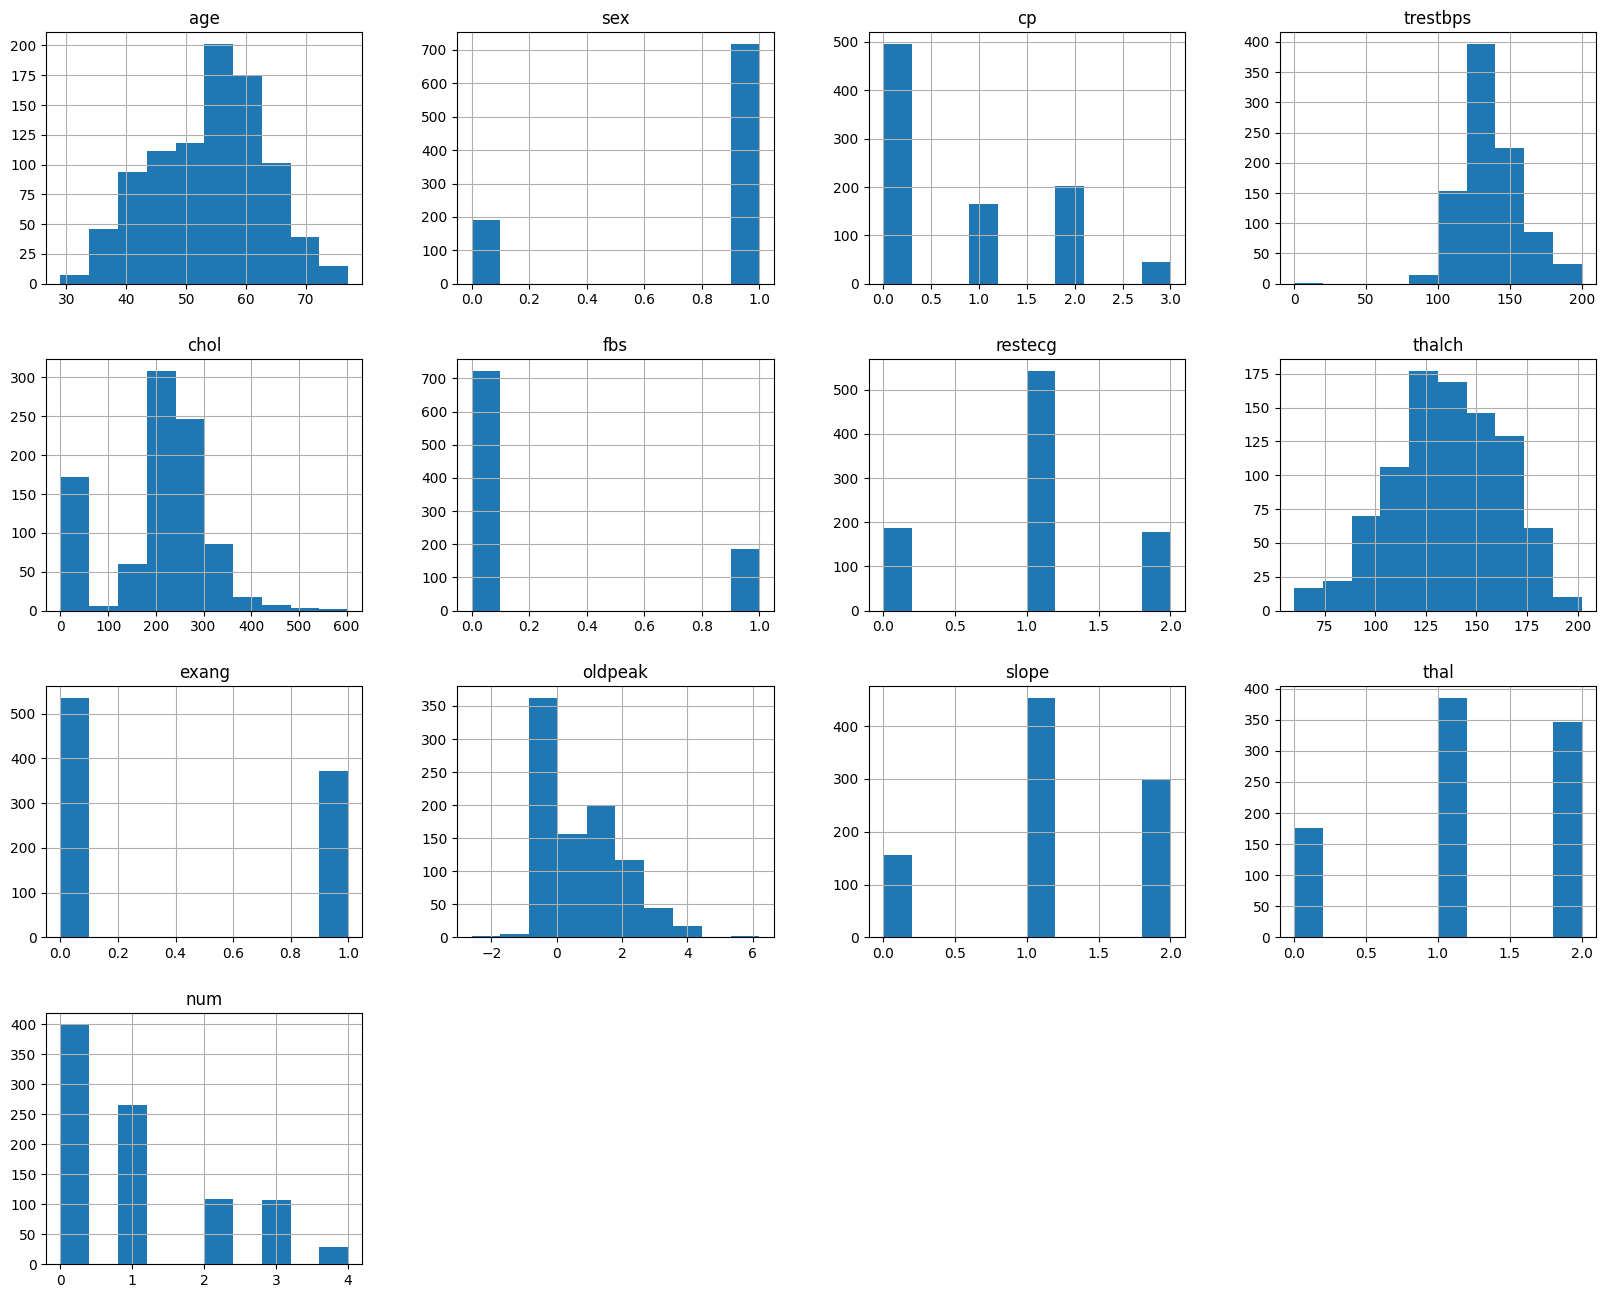

In [ ]:
data.hist(figsize =(20,16));

In [ ]:
data.num.unique()

array([0, 1, 2, 3, 4])

In [ ]:
# the 'num' column contains 5 categories where 0: no heart disease 1,2,3,4 : stages of heart disease
# so here we clubbed the stages as having heart disease
target_mapping = { 0: 'No Heart Disease', 1 : 'Heart Disease', 2: 'Heart Disease', 3: 'Heart Disease', 4: 'Heart Disease'}

In [ ]:
data.num.map(target_mapping)

0      No Heart Disease
1      No Heart Disease
2      No Heart Disease
3      No Heart Disease
4      No Heart Disease
             ...       
903       Heart Disease
904       Heart Disease
905       Heart Disease
906       Heart Disease
907       Heart Disease
Name: num, Length: 907, dtype: object

In [ ]:
data.num.value_counts()

num
0    399
1    265
2    108
3    107
4     28
Name: count, dtype: int64

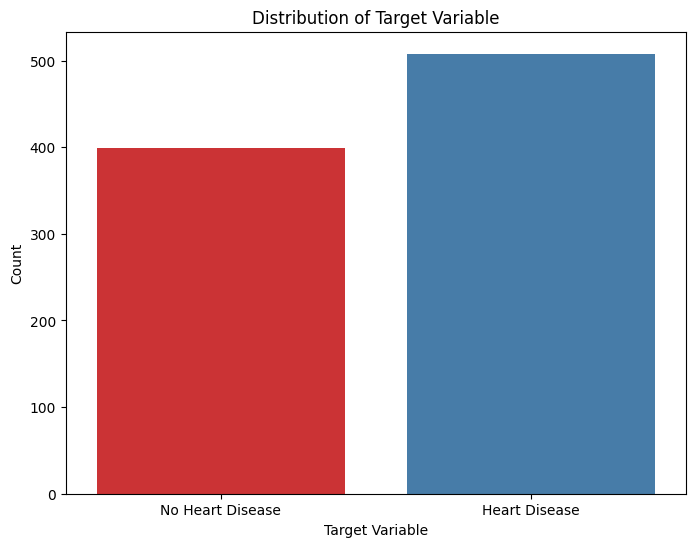

In [ ]:
# plotting a graph to check the count of people with no heart disease and with heart disease
plt.figure(figsize=(8,6))
sns.countplot(x = data.num.map(target_mapping), palette = 'Set1')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

<Axes: >

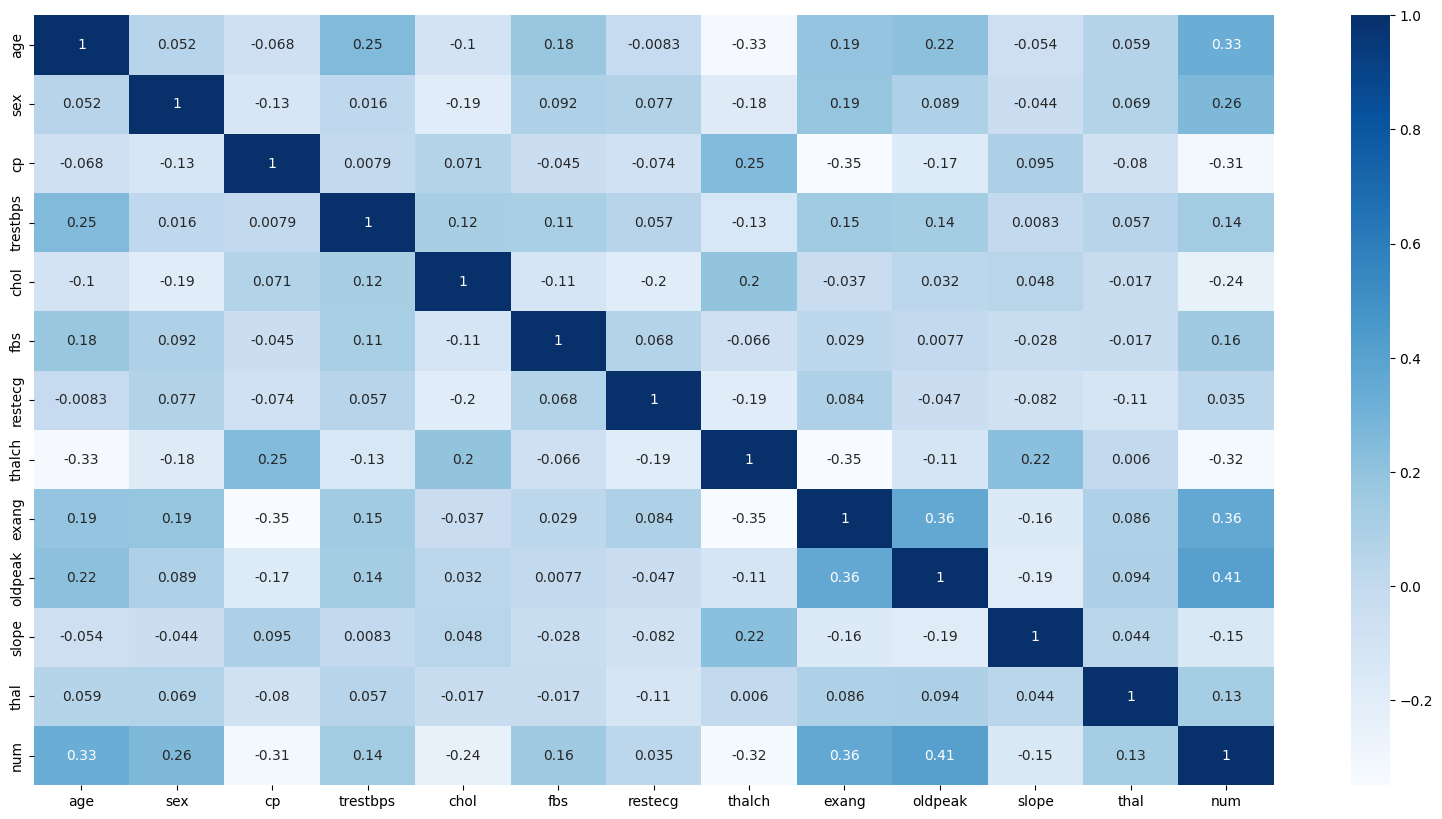

In [ ]:
# Correlation Heatmap
data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),annot= True,cmap='Blues')

# Setting the Target

In [ ]:
## training model where the target var-'num' is not clubbed as 0,1

In [ ]:
x = data.drop('num',axis = 1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2
904,62,1,0,166,170,0,2,120,1,3.0,1,2
905,56,1,2,170,0,0,0,123,1,2.5,0,1
906,56,1,2,144,208,1,2,105,1,0.5,0,0


In [ ]:
y = data.num

In [ ]:
y.value_counts()

num
0    399
1    265
2    108
3    107
4     28
Name: count, dtype: int64

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=None)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
from sklearn import tree

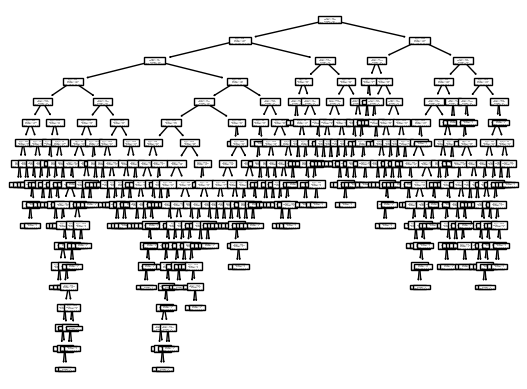

In [ ]:
tree.plot_tree(dt);

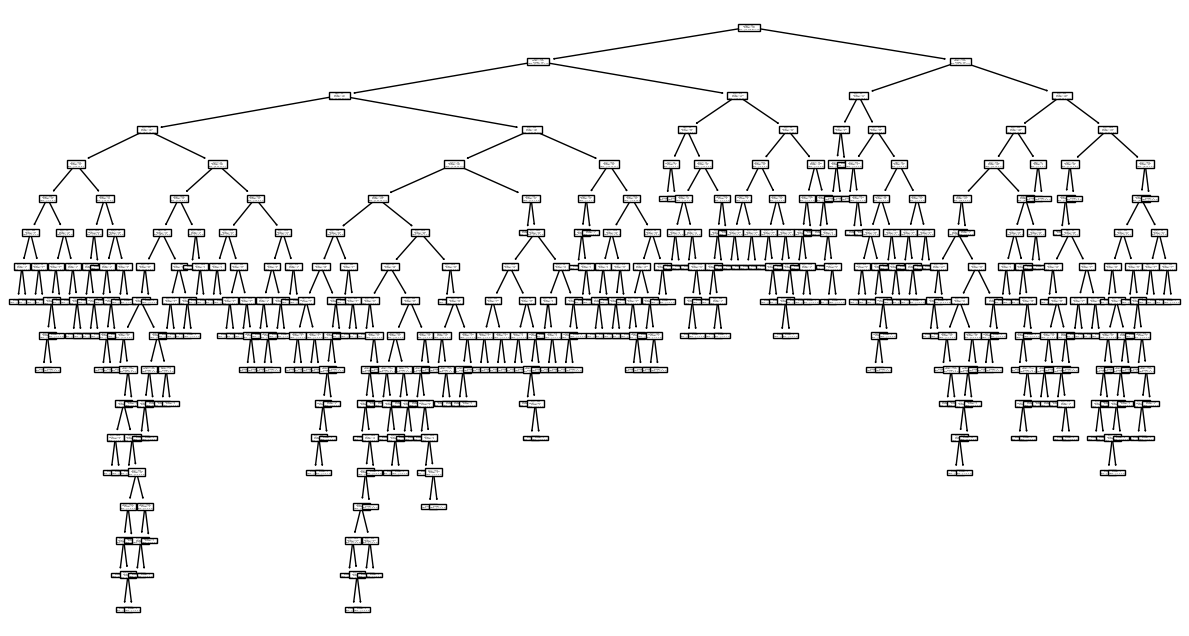

In [ ]:
plt.figure(figsize=(15,8))
tree.plot_tree(dt);

In [ ]:
preds = dt.predict(x_test)

In [ ]:
pd.Series(preds).value_counts()

0    81
1    53
2    31
3    15
4     2
Name: count, dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

num
0    89
1    47
2    20
3    17
4     9
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        89
           1       0.42      0.47      0.44        47
           2       0.26      0.40      0.31        20
           3       0.27      0.24      0.25        17
           4       0.00      0.00      0.00         9

    accuracy                           0.52       182
   macro avg       0.34      0.36      0.34       182
weighted avg       0.53      0.52      0.52       182



In [ ]:
## accuracy score  - 52% not a great one

In [ ]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

          importance
chol        0.153098
age         0.145552
thalch      0.145255
trestbps    0.115291
oldpeak     0.104478
cp          0.101651
thal        0.056346
slope       0.055839
restecg     0.053448
exang       0.038043
sex         0.022711
fbs         0.008287


In [ ]:
# cholestrol showed highest importance

In [ ]:
# Hypertuning parameters
from sklearn.model_selection import GridSearchCV

parameters =[{
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}]

grid_search = GridSearchCV(dt,parameters,cv = 5,n_jobs=-1)
grid = grid_search.fit(x_train,y_train)
grid.best_score_

0.5310344827586208

In [ ]:
parameters =[{
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 5, 7, 10, 15],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}]

grid_search = GridSearchCV(dt,parameters,cv = 5,n_jobs=-1)
grid = grid_search.fit(x_train,y_train)
grid.best_score_

0.5531034482758621

In [ ]:
## getting a low accuracy of 53% or 55% even when hypertuning parameters

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 30}

## New dataset where 'num' col (target) has clubbed values as 0,1 where 0 is no heart disease and 1 is having heart disease

In [ ]:
df =data.copy()

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,0.5,0,0,4


In [ ]:
df.num.unique()

array([0, 1, 2, 3, 4])

In [ ]:
df.num = df.num.map({0:0, 1:1, 2:1, 3:1, 4:1})

In [ ]:
df.num.unique()  # 0 - no heart disease | 1- has heart disease

array([0, 1])

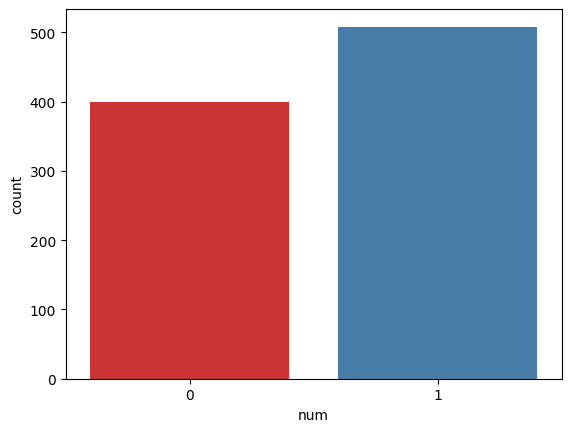

In [ ]:
sns.countplot(x = df.num, palette='Set1');

In [ ]:
df.num.value_counts()

num
1    508
0    399
Name: count, dtype: int64

In [ ]:
# Setting the target
x = df.drop('num',axis=1)

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2
904,62,1,0,166,170,0,2,120,1,3.0,1,2
905,56,1,2,170,0,0,0,123,1,2.5,0,1
906,56,1,2,144,208,1,2,105,1,0.5,0,0


In [ ]:
 y = df.num

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    1
905    1
906    1
907    1
Name: num, Length: 907, dtype: int64

In [ ]:
# Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier(random_state = 4)

## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters =[{
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}]

grid_search = GridSearchCV(DT,parameters,cv = 5,n_jobs=-1)
grid = grid_search.fit(x_train,y_train)
grid.best_score_

0.7834482758620689

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [ ]:
parameters =[{
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 5, 7, 10, 15],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}]

grid_search = GridSearchCV(DT,parameters,cv = 5,n_jobs=-1)
grid = grid_search.fit(x_train,y_train)
grid.best_score_

0.8

In [ ]:
# finding the best parameters
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

In [ ]:
#creating a new classifier with the new best parameters

In [ ]:
best_DT = DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,min_samples_leaf=20,min_samples_split=2)

In [ ]:
best_DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20)

In [ ]:
DT_predict = best_DT.predict(x_test)

In [ ]:
pd.Series(DT_predict).value_counts()

1    101
0     81
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

num
1    102
0     80
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,DT_predict))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        80
           1       0.84      0.83      0.84       102

    accuracy                           0.82       182
   macro avg       0.82      0.82      0.82       182
weighted avg       0.82      0.82      0.82       182



In [ ]:
best_DT.score(x_train,y_train)

0.8220689655172414

In [ ]:
best_DT.score(x_test,y_test)

0.8186813186813187

In [ ]:
# got accuracy score of around 82% and comparing it with training score which is also around 82% suggesting a good fit.

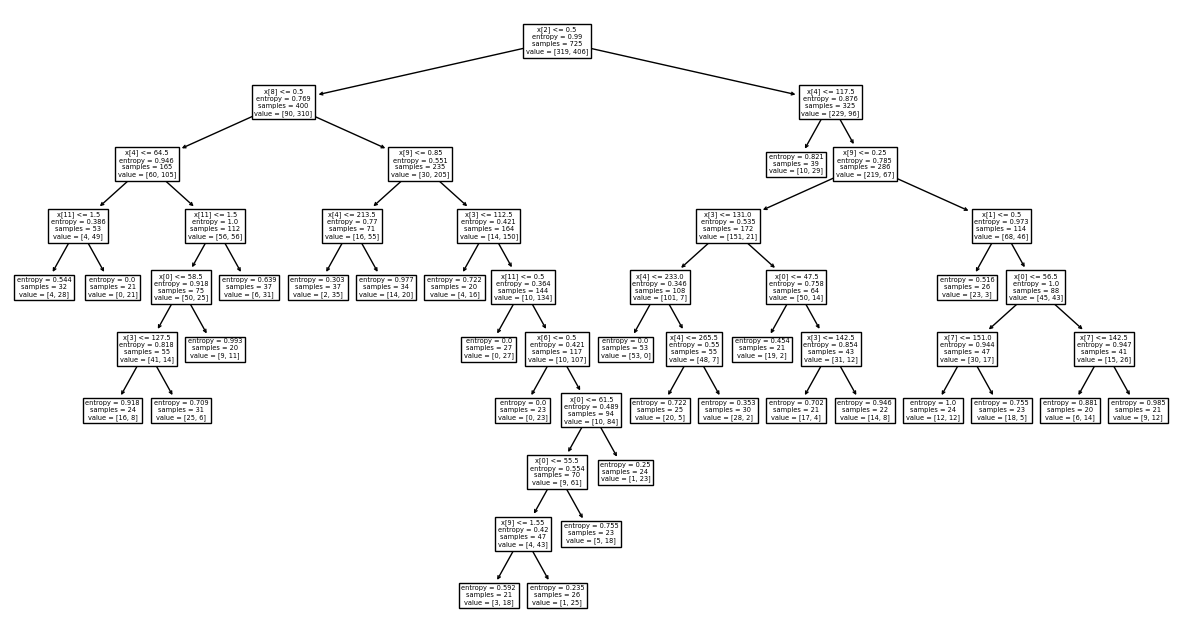

In [ ]:
plt.figure(figsize=(15,8))
tree.plot_tree(best_DT);

In [ ]:
# to check important feature, here chest pain type(cp) is the most imp feature
feature_importances = pd.DataFrame(best_DT.feature_importances_,
                                   index = x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

          importance
cp          0.400223
chol        0.225147
oldpeak     0.091501
thal        0.081988
exang       0.070837
age         0.044275
trestbps    0.033662
sex         0.030482
thalch      0.011276
restecg     0.010609
fbs         0.000000
slope       0.000000


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
cm = confusion_matrix(y_test, DT_predict)
cm

array([[64, 16],
       [17, 85]])

In [ ]:
y_prob = best_DT.predict_proba(x_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.8965686274509804

In [ ]:
# experimenting once more to check for better accuracy

In [ ]:
DT = DecisionTreeClassifier(random_state=0)
best_DT = DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,min_samples_leaf=25,min_samples_split=2)

In [ ]:
best_DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=25)

In [ ]:
DT_predict = best_DT.predict(x_test)

In [ ]:
pd.Series(DT_predict).value_counts()

1    95
0    87
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

num
1    102
0     80
Name: count, dtype: int64

In [ ]:
print(classification_report(y_test,DT_predict))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        80
           1       0.84      0.78      0.81       102

    accuracy                           0.80       182
   macro avg       0.79      0.80      0.80       182
weighted avg       0.80      0.80      0.80       182



In [ ]:
best_DT.score(x_train,y_train)

0.8193103448275862

In [ ]:
best_DT.score(x_test,y_test)

0.7967032967032966

In [ ]:
# got a little lower score than the previous one

In [ ]:
print('-'*160)

----------------------------------------------------------------------------------------------------------------------------------------------------------------
